## Model Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet34_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Files already downloaded and verified
Before temperature - NLL: 0.332, ECE: 0.049
Optimal temperature: 4.904
After temperature - NLL: 0.883, ECE: 0.462


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5290 ± 0.0027
Final Average Prediction Set Size: 1.52 ± 0.02
Final Average Coverage: 0.9467 ± 0.0031
Final Average Real Probability: 0.9186 ± 0.0037


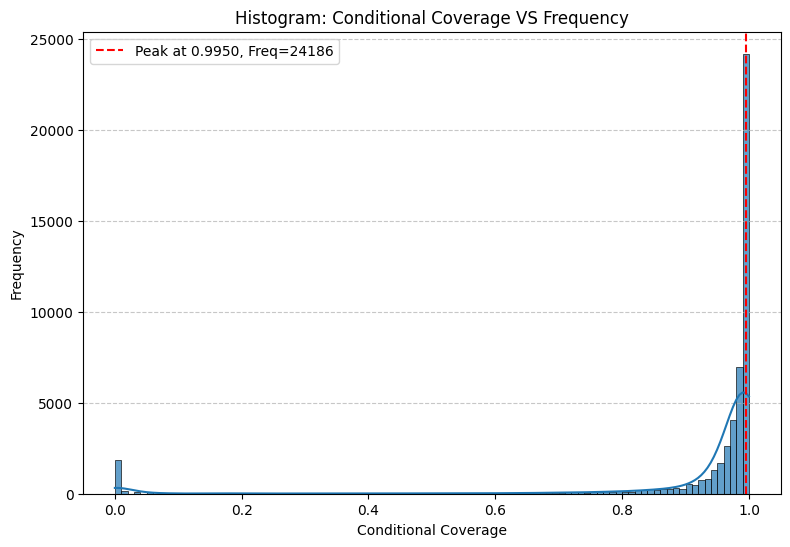

24186 (48.37%) samples reached the peak conditional coverage at 0.9950


In [5]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5290 ± 0.0027
Final Average Prediction Set Size: 1.52 ± 0.02
Final Average Coverage: 0.9467 ± 0.0031
Final Average Real Probability: 0.9186 ± 0.0037


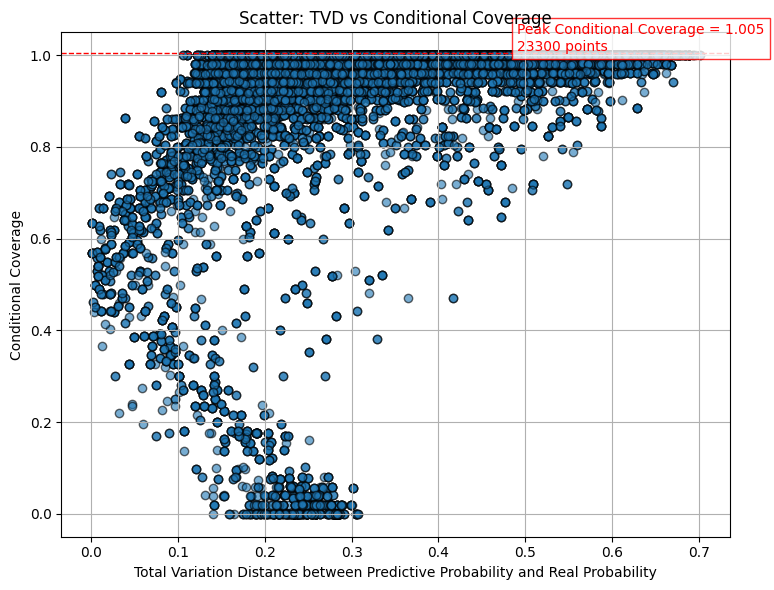

Peak Conditional Coverage = 1.005, with 23300 samples

=== Count Regions Summary ===
41650 (83.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
1928 (3.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2736 (5.5%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.78437']
  Real Probability Set      : ['0.86275']
Sample 2:
  Predictive Probability Set: ['0.66324']
  Real Probability Set      : ['0.86000']
Sample 3:
  Predictive Probability Set: ['0.63671']
  Real Probability Set      : ['0.82692']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.46364', '0.09632']
  Real Probability Set      : ['0.03922', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.36290', '0.16820']
  Real Probability Set      : ['0.01961', '0.01961']
Sample 3:
  Predictive Probability Set: ['0.21483', '0.19336']
  Real Probability Set      : ['

In [3]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5299 ± 0.0023
Final Average Prediction Set Size: 1.51 ± 0.01
Final Average Coverage: 0.9469 ± 0.0028
Final Average Real Probability: 0.9186 ± 0.0036


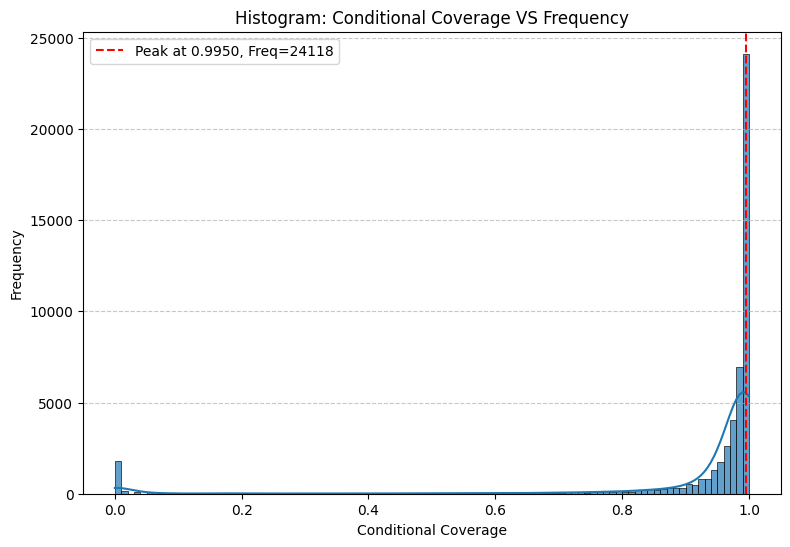

24118 (48.24%) samples reached the peak conditional coverage at 0.9950


In [6]:
raps_cifar10h_hist(model, dataset, device, lambda_=0.01, k_reg=2, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5299 ± 0.0023
Final Average Prediction Set Size: 1.51 ± 0.01
Final Average Coverage: 0.9469 ± 0.0028
Final Average Real Probability: 0.9186 ± 0.0036


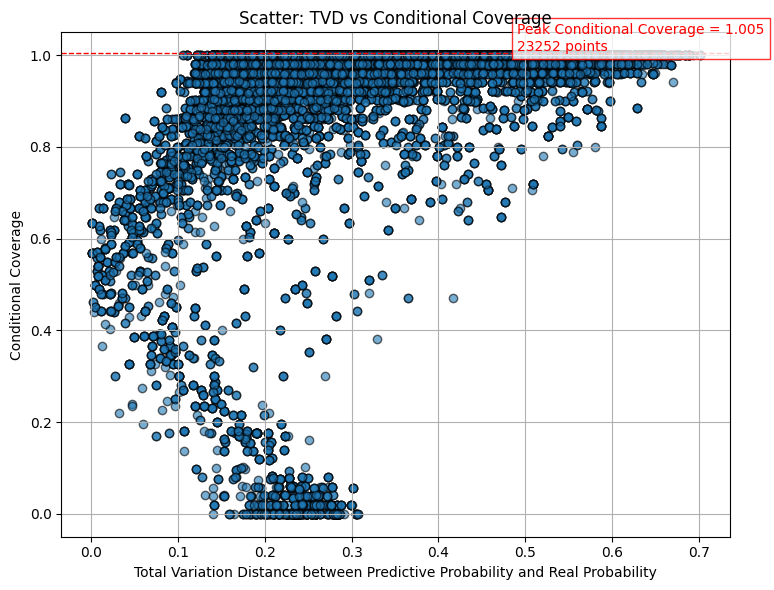

Peak Conditional Coverage = 1.005, with 23252 samples

=== Count Regions Summary ===
41805 (83.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
1830 (3.7%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2764 (5.5%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.74465']
  Real Probability Set      : ['0.94000']
Sample 2:
  Predictive Probability Set: ['0.75871']
  Real Probability Set      : ['0.92000']
Sample 3:
  Predictive Probability Set: ['0.68587']
  Real Probability Set      : ['0.86000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.58505']
  Real Probability Set      : ['0.02000']
Sample 2:
  Predictive Probability Set: ['0.50493']
  Real Probability Set      : ['0.03922']
Sample 3:
  Predictive Probability Set: ['0.24849', '0.16054', '0.15646']
  Real Probability Set      : ['0.06000', '0.00000', '0.02000']



In [4]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.01, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.2909 ± 0.1118
Final Average Prediction Set Size: 1.37 ± 0.05
Final Average Coverage: 0.9493 ± 0.0034
Final Average Real Probability: 0.9204 ± 0.0045


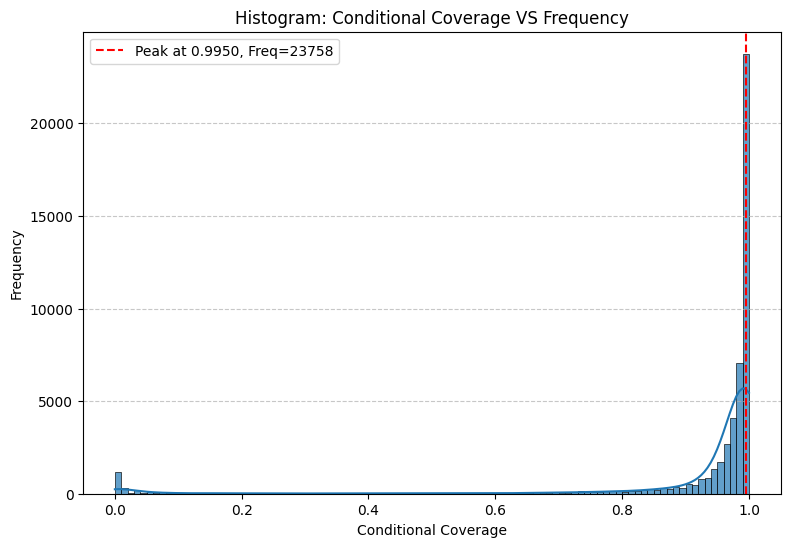

23758 (47.52%) samples reached the peak conditional coverage at 0.9950


In [6]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0730 ± 0.1477
Final Average Prediction Set Size: 1.27 ± 0.07
Final Average Coverage: 0.9490 ± 0.0047
Final Average Real Probability: 0.9185 ± 0.0058


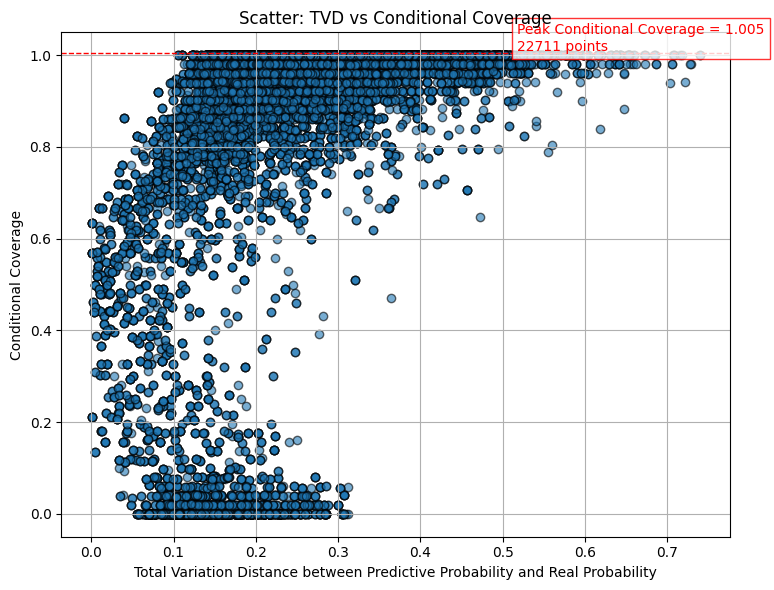

Peak Conditional Coverage = 1.005, with 22711 samples

=== Count Regions Summary ===
44047 (88.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
342 (0.7%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
4477 (9.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.66324']
  Real Probability Set      : ['0.86000']
Sample 2:
  Predictive Probability Set: ['0.64092']
  Real Probability Set      : ['0.82353']
Sample 3:
  Predictive Probability Set: ['0.69639']
  Real Probability Set      : ['0.82000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.43220']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.49603']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.46364']
  Real Probability Set      : ['0.03922']

--- Region 3: medium TVD, medium Coverage ---

In [7]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05)